In [187]:
# Load the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.stats import weightstats as stests
from scipy.stats import f_oneway
from statsmodels.stats.proportion import proportions_ztest

In [188]:
# read into pandas dataframe
mydata = pd.read_csv('insurance.csv')

In [189]:
# Check first 5 records
mydata.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [190]:
# shape
print(mydata.shape)

(1338, 7)


In [191]:
#  Data type checking
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [192]:
# Making a list of missing value types
missing_values = ["n/a", "na", "--",".","?","??"]
mydata = pd.read_csv("insurance.csv", na_values = missing_values)
# Total missing values for each feature
print (mydata.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [193]:
# 5 point summary
mydata.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


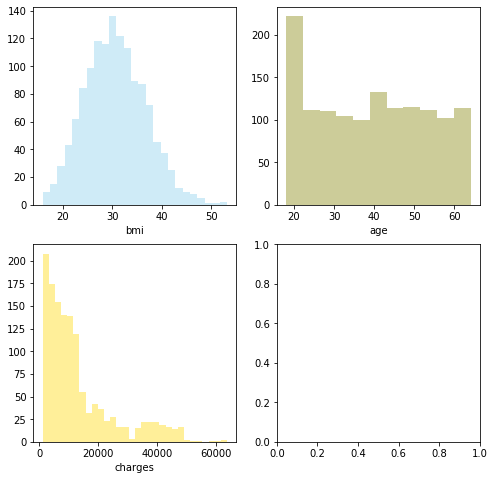

In [194]:
# Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

f, axes = plt.subplots(2, 2, figsize=(8, 8))
sns.distplot( mydata["bmi"] , hist=True, kde=False, color="skyblue", ax=axes[0, 0])
sns.distplot( mydata["age"] , hist=True, kde=False, color="olive", ax=axes[0, 1])
sns.distplot( mydata["charges"] , hist=True, kde=False, color="gold", ax=axes[1, 0])

In [195]:
#Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

mydataskew = mydata[['bmi','age','charges']]
mydataskew.skew()


bmi        0.284047
age        0.055673
charges    1.515880
dtype: float64

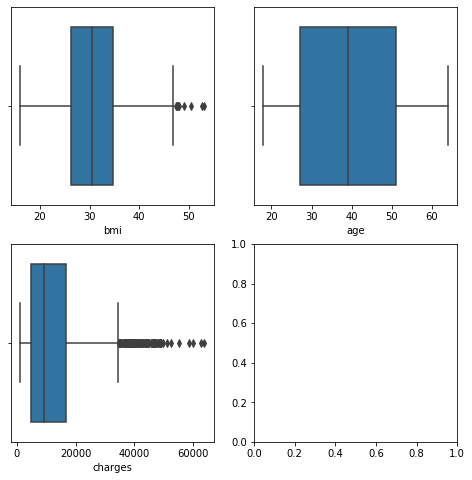

In [196]:
#Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

f, axes = plt.subplots(2, 2, figsize=(8, 8))
sns.boxplot( mydata["bmi"], ax=axes[0, 0])
sns.boxplot( mydata["age"], ax=axes[0, 1])
sns.boxplot( mydata["charges"], ax=axes[1, 0])


In [197]:
#smoker,children,region and sex categorical variables

mydatacategorical = mydata[['children','region','sex','smoker']]
pd.pivot_table(mydatacategorical, index=['children', 'sex'], columns=[ 'region','smoker'], aggfunc=len)

region          northeast       northwest       southeast       southwest  \
smoker                 no   yes        no   yes        no   yes        no   
children sex                                                                
0        female      65.0   7.0      55.0  17.0      57.0  19.0      59.0   
         male        56.0  19.0      53.0   7.0      60.0  21.0      54.0   
1        female      27.0  12.0      29.0   4.0      41.0   6.0      36.0   
         male        28.0  10.0      36.0   5.0      32.0  16.0      34.0   
2        female      24.0   6.0      27.0   4.0      23.0   5.0      23.0   
         male        18.0   3.0      28.0   7.0      25.0  13.0      17.0   
3        female      13.0   4.0      21.0   4.0      12.0   6.0      17.0   
         male        16.0   6.0      12.0   9.0      12.0   5.0      15.0   
4        female       3.0   NaN       2.0   NaN       3.0   NaN       3.0   
         male         4.0   NaN       3.0   1.0       2.0   NaN       2.0   
5        female       NaN   NaN       1.0   NaN       3.0   NaN       3.0   
         male         3.0   NaN       NaN   NaN       3.0   NaN       4.0   

region                 
smoker            yes  
children sex           
0        female  10.0  
         male    15.0  
1        female   3.0  
         male     5.0  
2        female   7.0  
         male    10.0  
3        female   NaN  
         male     5.0  
4        female   NaN  
         male     2.0  
5        female   1.0  
         male     NaN

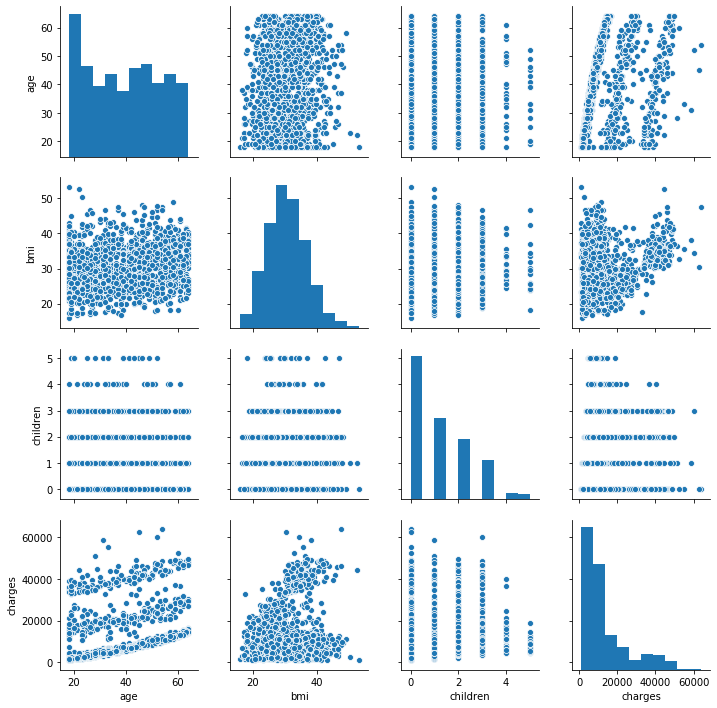

In [198]:
#Pair plot of all columns

sns.pairplot(mydata)

4a -> Do charges of people who smoke differ significantly from the people who don't?

Ho : Charges does not differ, they are equal

Ha : Charges differ between people who smoke and who dont

8434.268297856199
32050.23183153285
0.0
Reject the null hypothesis


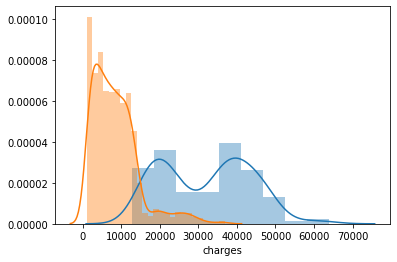

In [199]:
charges_smoker = mydata[mydata['smoker'] == 'yes'].charges
charges_NS = mydata[mydata['smoker'] == 'no'].charges

sns.distplot( charges_smoker)
sns.distplot( charges_NS)

print(charges_NS.mean())
print(charges_smoker.mean())


ztest ,pval = stests.ztest(charges_smoker, x2=charges_NS ,value=0)
print(float(pval))

if pval < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')


4b -> Does bmi of males differ significantly from that of females?

Ho : Variation in bmi of men and women is equal or same

Ha : Variation in bmi of men is greater than it is in women

In [200]:
male = mydata[mydata['sex'] == 'male'].bmi.iloc[:-14]   #excluding the last 14 elements to match the size 2 samples
female = mydata[mydata['sex'] == 'female'].bmi
v1, v2 = np.var(female) , np.var(male)
print(v1,v2)
n = 662  # number of samples
dof = n - 1  # degrees of freedom
alpha = 0.05  # significance level
chi_critical = 722.96    # critical chi statistic calculated -> https://www.danielsoper.com/statcalc/calculator.aspx?id=12
chi = (dof*v1)/v2
print(chi)

if chi < chi_critical:
    print("Since the test statistic is less than the critical value, we fail to reject the null")
else:
    print("Since the test statistic is more than the critical value, we reject the null")

36.49917703379856 37.060771284489896
650.9836461346845
Since the test statistic is less than the critical value, we fail to reject the null



4c -> Is the proportion of smokers significantly different in different genders?

Ho : The proportions are equal


Ha : The two proportions are not equal

In [201]:
female_smokers = mydata[mydata['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
male_smokers = mydata[mydata['sex'] == 'male'].smoker.value_counts()[1] # number of male smokers
n_females = mydata.sex.value_counts()[1] # number of females in the data
n_males = mydata.sex.value_counts()[0] #number of males in the data
print([female_smokers, male_smokers] , [n_females, n_males])
print(f' Proportion of smokers in females, males = {round(115/662,2)}%, {round(159/676,2)}% respectively')


stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} Reject the null hypothesis')
else:
    print(f'With a p-value of {round(pval,4)} Fail to reject the null hypothesis')

[115, 159] [662, 676]
 Proportion of smokers in females, males = 0.17%, 0.24% respectively
With a p-value of 0.0053 Reject the null hypothesis


4d -> Is the distribution of bmi across women with no children, one child and two children, the same?

Ho : Distribution of bmi across children are same


Ha : Distribution of bmi across at least one child not same

574 324 240
30.55 30.623 30.978
stat=0.417, p=0.659
Fail to reject null hypothesis


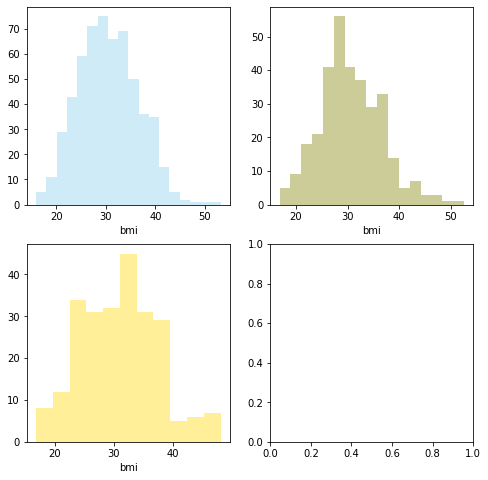

In [202]:
bmi_zero = mydata[mydata['children'] == 0 ].bmi
bmi_one = mydata[mydata['children'] == 1 ].bmi
bmi_two = mydata[mydata['children'] == 2 ].bmi

f, axes = plt.subplots(2, 2, figsize=(8, 8))
sns.distplot( bmi_zero , hist=True, kde=False, color="skyblue", ax=axes[0, 0])
sns.distplot( bmi_one , hist=True, kde=False, color="olive", ax=axes[0, 1])
sns.distplot( bmi_two , hist=True, kde=False, color="gold", ax=axes[1, 0])

print (bmi_zero.count(),bmi_one.count(), bmi_two.count())
print (round(bmi_zero.mean(),3),round(bmi_one.mean(),3),round(bmi_two.mean(),3))


stat, p = f_oneway(bmi_zero, bmi_one, bmi_two)
print('stat=%.3f, p=%.3f' % (stat, p))

if p < 0.05:
	print('Reject null hypothesis')
else:
	print('Fail to reject null hypothesis')